In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from mlxtend.frequent_patterns import apriori, association_rules

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# Replace 'data.csv' with your actual file name
df = pd.read_csv('/content/hypertension_dataset.csv')

# Show the first 5 rows
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


In [ ]:
print("Shape:", df.shape)
print(df.info())

Shape: (1985, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB
None


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Age,0
Salt_Intake,0
Stress_Score,0
BP_History,0
Sleep_Duration,0
BMI,0
Medication,799
Family_History,0
Exercise_Level,0
Smoking_Status,0


In [ ]:
# mode_value = df['Medication'].mode()[0]
# df['Medication'].fillna(mode_value, inplace=True)

df.drop('Medication', axis=1, inplace=True)

In [ ]:
df.isnull().sum()

,0
Age,0
Salt_Intake,0
Stress_Score,0
BP_History,0
Sleep_Duration,0
BMI,0
Family_History,0
Exercise_Level,0
Smoking_Status,0
Has_Hypertension,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1985.0,50.341058,19.442042,18.0,34.0,50.0,67.0,84.0
Salt_Intake,1985.0,8.531688,1.994907,2.5,7.2,8.5,9.9,16.4
Stress_Score,1985.0,4.979345,3.142303,0.0,2.0,5.0,8.0,10.0
Sleep_Duration,1985.0,6.452242,1.542207,1.5,5.4,6.5,7.5,11.4
BMI,1985.0,26.015315,4.512857,11.9,23.0,25.9,29.1,41.9


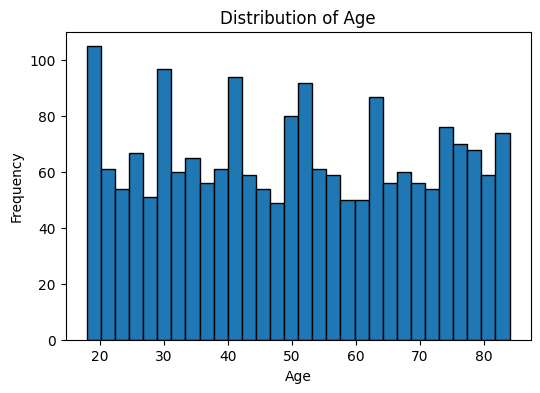

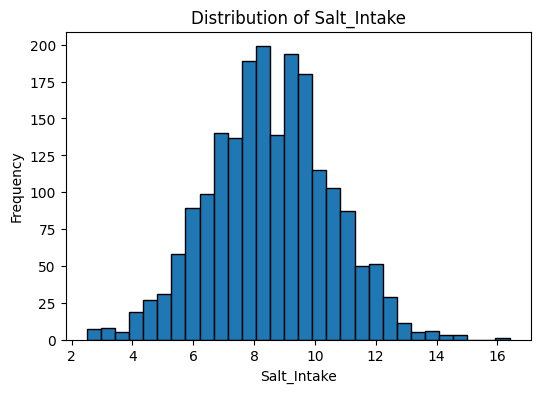

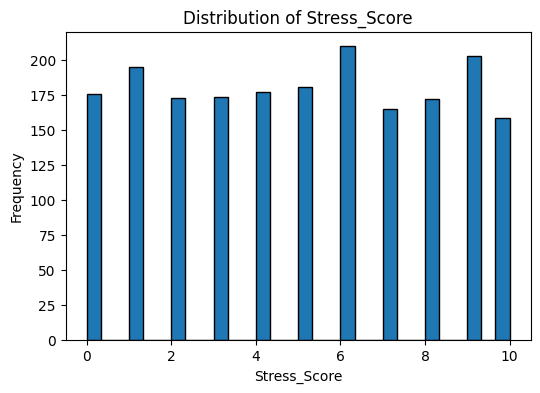

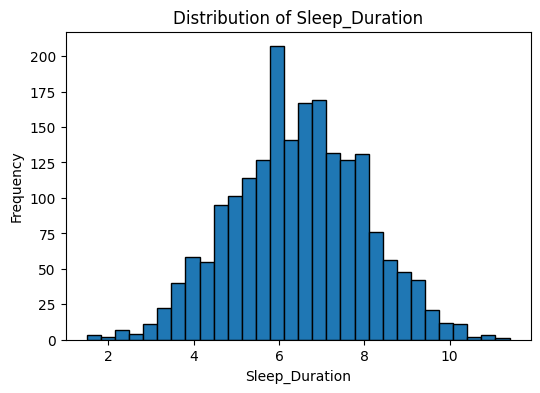

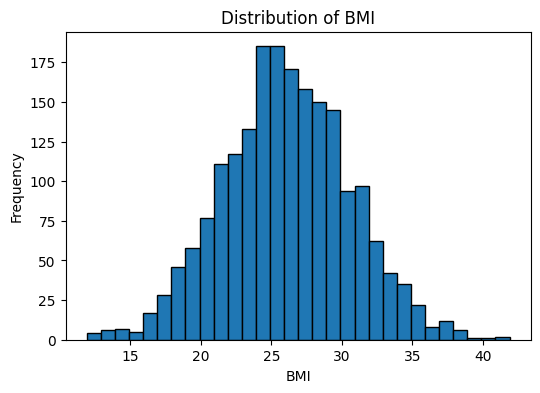

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30, edgecolor='black', color='#1f77b4')  # dark blue color
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    print("\n")

Value counts for BP_History:
BP_History
Normal             796
Prehypertension    620
Hypertension       569
Name: count, dtype: int64


Value counts for Family_History:
Family_History
No     1000
Yes     985
Name: count, dtype: int64


Value counts for Exercise_Level:
Exercise_Level
Low         936
Moderate    658
High        391
Name: count, dtype: int64


Value counts for Smoking_Status:
Smoking_Status
Non-Smoker    1417
Smoker         568
Name: count, dtype: int64


Value counts for Has_Hypertension:
Has_Hypertension
Yes    1032
No      953
Name: count, dtype: int64




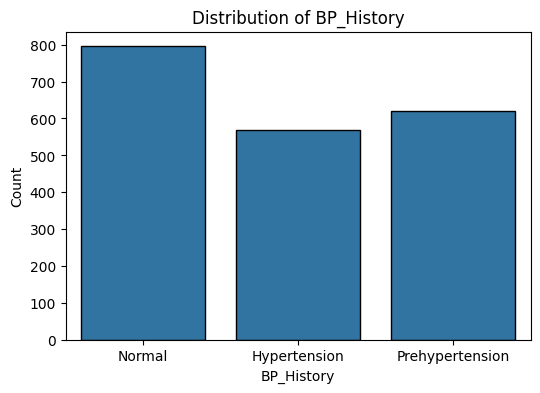

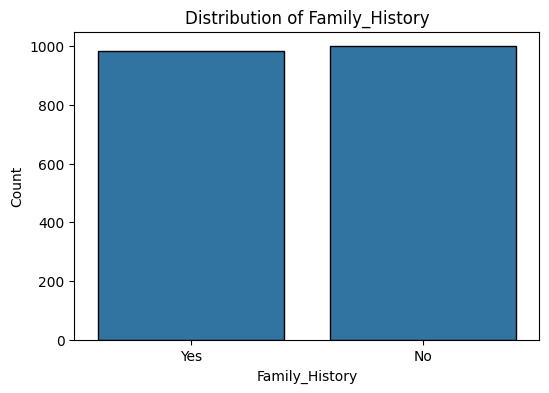

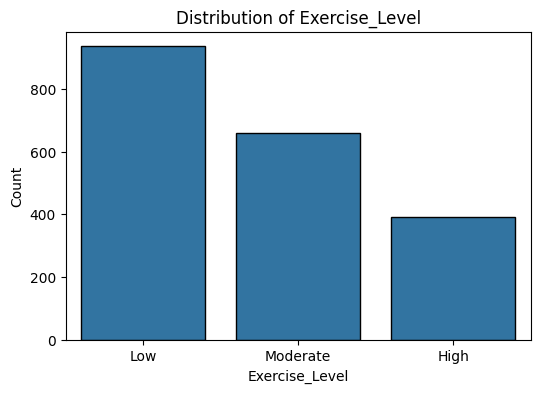

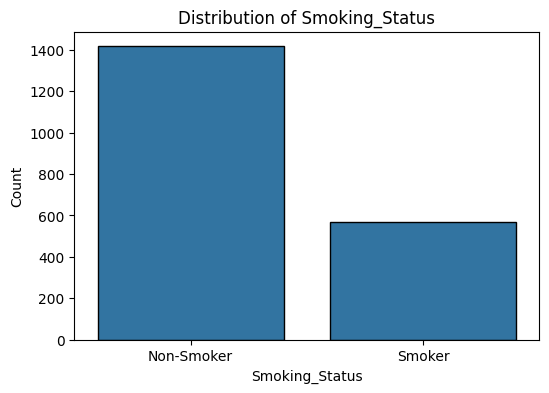

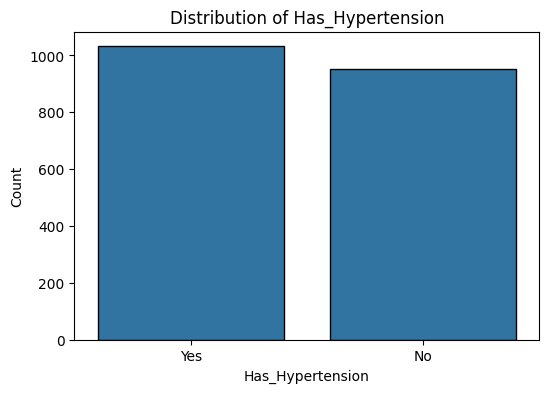

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

# Print value counts
for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")


for i, col in enumerate(categorical_cols):
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df,
                  palette=['#1f77b4'],
                  edgecolor='black')  # black border
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    print("\n")

In [ ]:
print(df['Has_Hypertension'].value_counts())

Has_Hypertension
Yes    1032
No      953
Name: count, dtype: int64


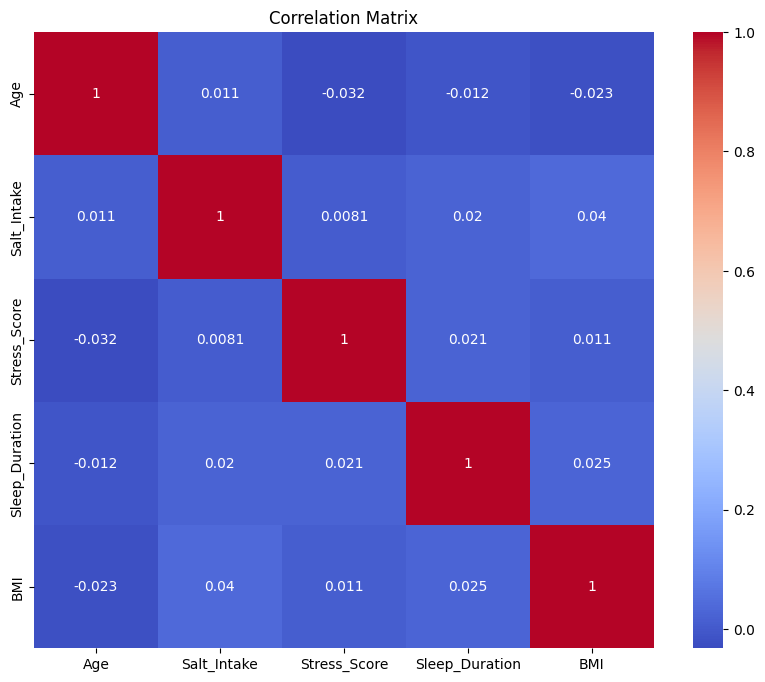

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Split dataset
X = df.drop('Has_Hypertension', axis=1)
y = df['Has_Hypertension']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Encode categorical features
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# Scale numeric features
numeric_cols = X.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [ ]:
y_test

,Has_Hypertension
291,Yes
592,Yes
152,No
1668,Yes
480,No
...,...
1473,No
1275,No
922,Yes
1449,No


In [ ]:
X_train.shape

(1588, 9)

In [ ]:
X_train.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Family_History,Exercise_Level,Smoking_Status
1168,1.057045,-0.613890,1.291772,0,0.711610,0.168521,0,2,0
1680,-0.944756,-0.218611,-0.299396,2,0.711610,0.765425,1,1,0
115,-1.047413,-0.218611,-1.254097,2,0.843747,0.898070,0,0,0
1602,0.184465,-0.959759,1.291772,1,-0.940104,-1.135824,0,2,1
1159,0.646419,-2.244415,0.655305,1,0.645541,-0.981071,1,2,1


In [ ]:
y_train.head()

,Has_Hypertension
1168,Yes
1680,No
115,No
1602,Yes
1159,Yes


In [ ]:
# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


--- Decision Tree ---
Accuracy: 0.8438287153652393
Precision: 0.8443212418008157
Recall: 0.8438287153652393
F1-score: 0.8438822502883658

Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.85      0.84       191
         Yes       0.86      0.83      0.85       206

    accuracy                           0.84       397
   macro avg       0.84      0.84      0.84       397
weighted avg       0.84      0.84      0.84       397



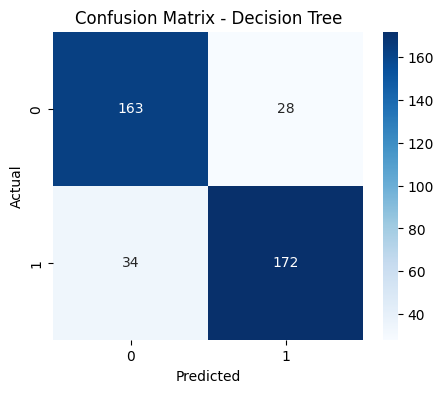


--- Random Forest ---
Accuracy: 0.8740554156171285
Precision: 0.8757109687237081
Recall: 0.8740554156171285
F1-score: 0.874084184684627

Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.90      0.87       191
         Yes       0.90      0.85      0.88       206

    accuracy                           0.87       397
   macro avg       0.87      0.88      0.87       397
weighted avg       0.88      0.87      0.87       397



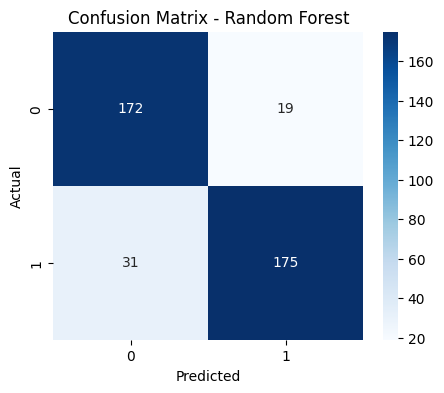


--- SVM ---
Accuracy: 0.8413098236775819
Precision: 0.8426906418601557
Recall: 0.8413098236775819
F1-score: 0.8413541300094505

Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.86      0.84       191
         Yes       0.87      0.82      0.84       206

    accuracy                           0.84       397
   macro avg       0.84      0.84      0.84       397
weighted avg       0.84      0.84      0.84       397



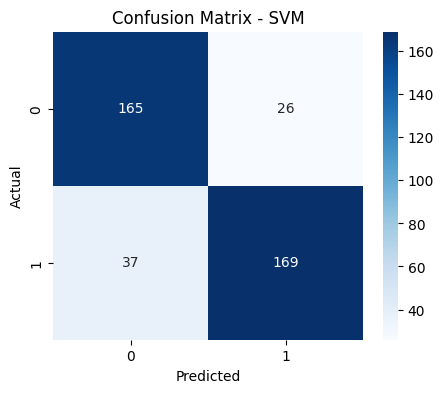


--- Logistic Regression ---
Accuracy: 0.7959697732997482
Precision: 0.796016170567877
Recall: 0.7959697732997482
F1-score: 0.795987919343428

Classification Report:
               precision    recall  f1-score   support

          No       0.79      0.79      0.79       191
         Yes       0.80      0.80      0.80       206

    accuracy                           0.80       397
   macro avg       0.80      0.80      0.80       397
weighted avg       0.80      0.80      0.80       397



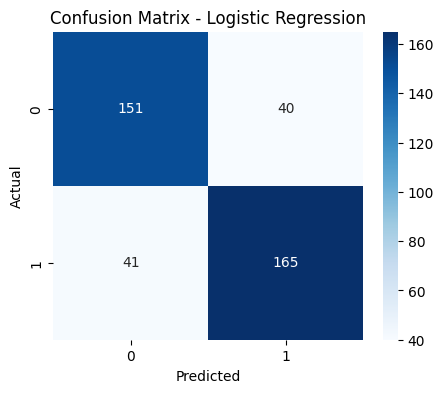

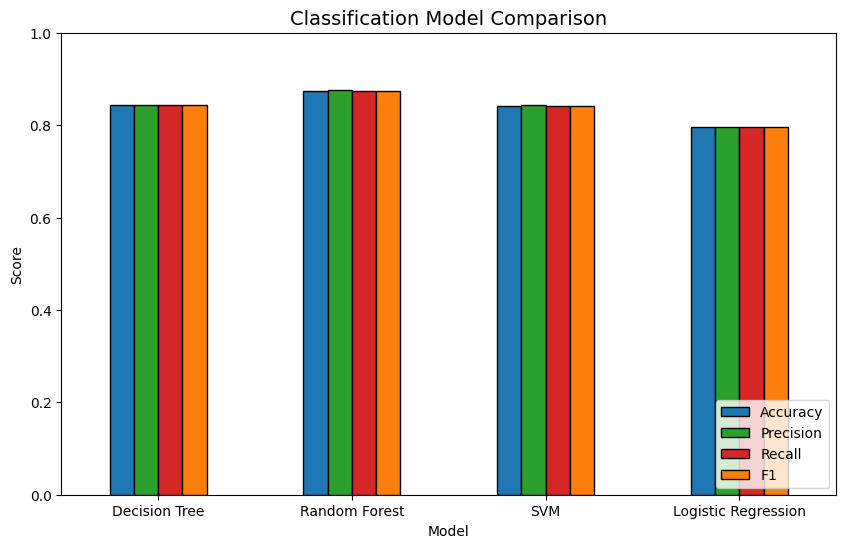

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Dictionary to store metrics
metrics_list = []

# Train models and collect metrics
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Store predictions to avoid retraining later
predictions = {}

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    # Save predictions
    predictions[name] = y_pred

    # Print metrics
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Append metrics to list
    metrics_list.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1": f1_score(y_test, y_pred, average='weighted')
    })

# Convert list of metrics to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Visualization colors (dark but distinct)
dark_colors = ['#1f77b4',  # dark blue
               '#2ca02c',  # dark green
               '#d62728',  # dark red
               '#ff7f0e']  # dark orange

# Visualization
metrics_df.set_index("Model", inplace=True)
ax = metrics_df.plot(kind='bar', figsize=(10, 6), color=dark_colors, edgecolor='black')
plt.title("Classification Model Comparison", fontsize=14)
plt.ylabel("Score")
plt.ylim(0, 1)  # Metrics between 0 and 1
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import LabelEncoder

# Convert categorical + discretized numeric features to one-hot encoding
df_arm = df.copy()

categorical_cols = df_arm.select_dtypes(include=['object']).columns
numeric_cols = df_arm.select_dtypes(include=[np.number]).columns

for col in categorical_cols:
    df_arm[col] = df_arm[col].astype(str)

# Optional: Discretize numeric features
for col in numeric_cols:
    df_arm[col] = pd.qcut(df_arm[col], q=4, duplicates='drop').astype(str) # Convert to string after qcut

# Exclude the target variable 'Has_Hypertension' before one-hot encoding
df_onehot = pd.get_dummies(df_arm.drop('Has_Hypertension', axis=1))


# Apply Apriori
frequent_itemsets = apriori(df_onehot, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
164,"(Family_History_Yes, Smoking_Status_Non-Smoker)","(Sleep_Duration_(1.499, 5.4])",0.356675,0.257935,0.101259,0.283898,1.100660,1.0,0.009261,1.036257,0.142159,0.197252,0.034989,0.338238
169,"(Sleep_Duration_(1.499, 5.4])","(Family_History_Yes, Smoking_Status_Non-Smoker)",0.257935,0.356675,0.101259,0.392578,1.100660,1.0,0.009261,1.059107,0.123243,0.197252,0.055809,0.338238
122,"(Smoking_Status_Non-Smoker, Family_History_No)","(Stress_Score_(2.0, 5.0])",0.357179,0.268010,0.103778,0.290550,1.084101,1.0,0.008051,1.031771,0.120682,0.199034,0.030793,0.338884
127,"(Stress_Score_(2.0, 5.0])","(Smoking_Status_Non-Smoker, Family_History_No)",0.268010,0.357179,0.103778,0.387218,1.084101,1.0,0.008051,1.049021,0.105981,0.199034,0.046730,0.338884
168,(Smoking_Status_Non-Smoker),"(Family_History_Yes, Sleep_Duration_(1.499, 5.4])",0.713854,0.131486,0.101259,0.141849,1.078813,1.0,0.007398,1.012076,0.255308,0.136087,0.011932,0.455982
165,"(Family_History_Yes, Sleep_Duration_(1.499, 5.4])",(Smoking_Status_Non-Smoker),0.131486,0.713854,0.101259,0.770115,1.078813,1.0,0.007398,1.244736,0.084115,0.136087,0.196616,0.455982
31,(Family_History_No),"(Salt_Intake_(9.9, 16.4])",0.503778,0.233753,0.126448,0.251000,1.073782,1.0,0.008689,1.023027,0.138471,0.206925,0.022508,0.395974
30,"(Salt_Intake_(9.9, 16.4])",(Family_History_No),0.233753,0.503778,0.126448,0.540948,1.073782,1.0,0.008689,1.080971,0.089674,0.206925,0.074906,0.395974
6,(Exercise_Level_Low),"(Age_(34.0, 50.0])",0.471537,0.241310,0.121914,0.258547,1.071432,1.0,0.008128,1.023248,0.126157,0.206309,0.022720,0.381883
7,"(Age_(34.0, 50.0])",(Exercise_Level_Low),0.241310,0.471537,0.121914,0.505219,1.071432,1.0,0.008128,1.068076,0.087874,0.206309,0.063737,0.381883


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, X_train_pca, y_train, cv=kf, scoring='accuracy')
    print(f"{name} CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Decision Tree CV Accuracy: 0.8375 ± 0.0127
Random Forest CV Accuracy: 0.8753 ± 0.0170
SVM CV Accuracy: 0.8413 ± 0.0096
Logistic Regression CV Accuracy: 0.7884 ± 0.0231
